# DS-SF-30 | Codealong 09: Linear Regression, Part 3

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - Model Fit and Customer Retention

In [3]:
train_df = pd.DataFrame({'t': range(8),
                         'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
                        columns = ['t', 'survival_rate'])

In [4]:
train_df

,t,survival_rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


In [5]:
train_df['y'] = train_df.survival_rate
train_df['x'] = train_df.t

In [6]:
def predict_mean(df):
    return pd.Series(train_df.y.mean(), index = range(df.shape[0]))

def score_mean(df):
    y_hat = predict_mean(df)
    y = df.y

    return 1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

score_mean(train_df)

0.0

In [7]:
def X_linear(df):
    X = df[ ['x'] ]

    return X

model_linear = linear_model.LinearRegression().fit(X_linear(train_df), train_df.y)

print model_linear.intercept_
print model_linear.coef_

def predict_linear(df):
    return model_linear.predict(X_linear(df))

def score_linear(df):
    return model_linear.score(X_linear(df), df.y)

score_linear(train_df)

0.925416666667
[-0.07094048]


0.92198254355381071

In [8]:
def X_quadratic(df):
    X = df[ ['x'] ]
    X['x ^ 2'] = X.x ** 2

    return X

model_quadratic = linear_model.LinearRegression().fit(X_quadratic(train_df), train_df.y)

print model_quadratic.intercept_
print model_quadratic.coef_

def predict_quadratic(df):
    return model_quadratic.predict(X_quadratic(df))

def score_quadratic(df):
    return model_quadratic.score(X_quadratic(df), df.y)

score_quadratic(train_df)

0.996708333333
[-0.14223214  0.01018452]


/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.99799345612402479

In [9]:
def X_exponential(df):
    X = df[ ['x'] ]

    return X

def y_exponential(df):
    y = df.y.apply(np.log)

    return y

model_exponential = linear_model.LinearRegression().fit(X_exponential(train_df), y_exponential(train_df))

print model_exponential.intercept_
print model_exponential.coef_

def predict_exponential(df):
    return np.exp(model_exponential.predict(X_exponential(df)))

def score_exponential(df):
    y_hat = predict_exponential(df)
    y = df.y

    return 1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

score_exponential(train_df)

-0.0621173991839
[-0.10201126]


0.96375302217040015

In [10]:
def y_hat_polynomial(x):
    return 1.\
           - .100597619 * x \
           - .0596777778 * (x ** 2) \
           + .0380569444 * (x ** 3) \
           - .0101944444 * (x ** 4) \
           + .00153611111 * (x ** 5) \
           - .000127777778 * (x ** 6) \
           + .00000456349206 * (x ** 7)

def predict_polynomial(df):
    return df.x.apply(y_hat_polynomial)

def score_polynomial(df):
    y_hat = predict_polynomial(df)
    y = df.y

    return 1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

score_polynomial(train_df)

0.99999999999998745

In [11]:
xs = pd.Series(np.linspace(0, 7, 700))
Xs = pd.DataFrame({'x' : xs})

y_hats_mean = predict_mean(Xs)
y_hats_linear = predict_linear(Xs)
y_hats_quadratic = predict_quadratic(Xs)
y_hats_exponential = predict_exponential(Xs)
y_hats_polynomial = predict_polynomial(Xs)

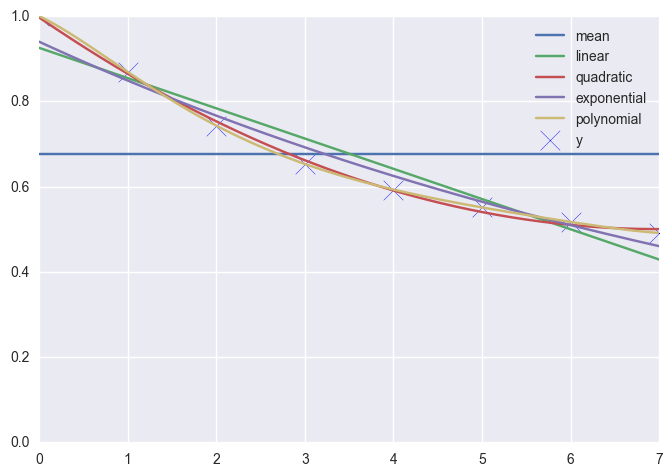

In [12]:
plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)

plt.plot(xs, y_hats_mean, label = 'mean')
plt.plot(xs, y_hats_linear, label = 'linear')
plt.plot(xs, y_hats_quadratic, label = 'quadratic')
plt.plot(xs, y_hats_exponential, label = 'exponential')
plt.plot(xs, y_hats_polynomial, label = 'polynomial')

plt.legend()

In [13]:
test_df = pd.DataFrame({'t': range(8, 13),
                        'survival_rate': [.468, .445, .427, .409, .394]},
                       columns = ['t', 'survival_rate'])

In [14]:
test_df['y'] = test_df.survival_rate
test_df['x'] = test_df.t

In [15]:
score_mean(test_df)

-90.691700377363944

In [16]:
print score_linear(test_df)
print model_linear.score(X_linear(test_df), test_df.y)

-73.4723092823
-73.4723092823


In [17]:
print score_quadratic(test_df)
print model_quadratic.score(X_quadratic(test_df), test_df.y)

-68.1062364324
-68.1062364324


/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
score_exponential(test_df)

-10.705481238004689

In [19]:
score_polynomial(test_df)

-30140.604767430337

In [20]:
xs = pd.Series(np.linspace(0, 12, 1200))
Xs = pd.DataFrame({'x' : xs})

y_hats_mean = predict_mean(Xs)
y_hats_linear = predict_linear(Xs)
y_hats_quadratic = predict_quadratic(Xs)
y_hats_exponential = predict_exponential(Xs)
y_hats_polynomial = predict_polynomial(Xs)

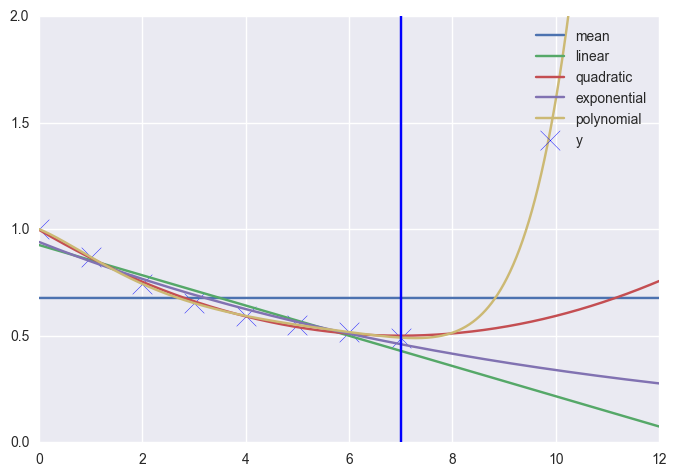

In [21]:
plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)

plt.plot(xs, y_hats_mean, label = 'mean')
plt.plot(xs, y_hats_linear, label = 'linear')
plt.plot(xs, y_hats_quadratic, label = 'quadratic')
plt.plot(xs, y_hats_exponential, label = 'exponential')
plt.plot(xs, y_hats_polynomial, label = 'polynomial')

plt.axvline(x = 7)

plt.legend()

## Part B - One-Hot Encoding for Categorical Variables and SF Housing

In [22]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [23]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [24]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           1.94e-31
Time:                        18:18:18   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [25]:
df.Baths.value_counts(dropna = False).sort_index()

 1.00     333
 1.10       1
 1.25       1
 1.50      37
 1.75       1
 2.00     323
 2.25       1
 2.50      44
 3.00     105
 3.50      18
         ... 
 4.50       6
 5.00      10
 5.50       2
 6.00       8
 6.50       1
 7.00       2
 7.50       1
 8.00       1
 14.00      1
NaN        42
Name: Baths, dtype: int64

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [26]:
# TODO
df = df[df.Baths.isin([1, 2, 3, 4])]

In [27]:
df.Baths.value_counts(dropna = False).sort_index()

1.0    333
2.0    323
3.0    105
4.0     33
Name: Baths, dtype: int64

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [28]:
baths_df = pd.get_dummies(df.Baths, prefix = 'Bath')

In [29]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [ ]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [ ]:
baths_df

In [ ]:
df = df.join([baths_df])

In [ ]:
df.columns

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO

## Part C - The Adverstising Dataset

In [13]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [14]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Plots

> ### Sales ~ TV

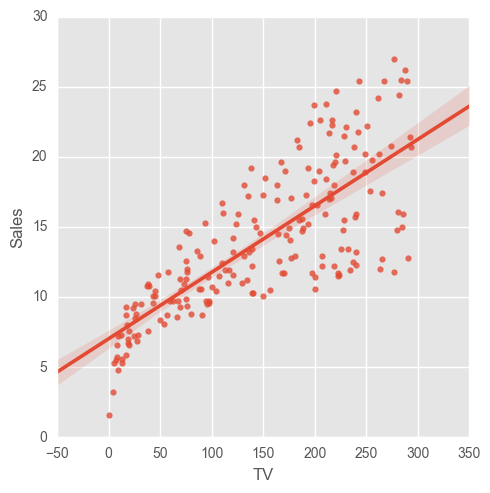

In [15]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

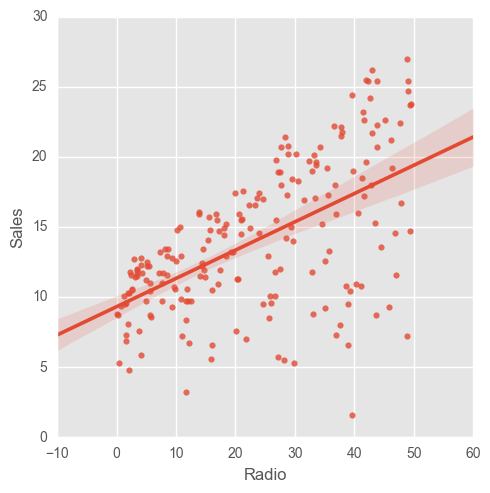

In [16]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

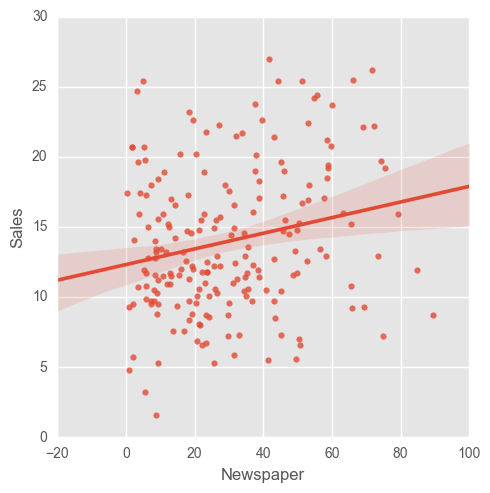

In [17]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [18]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.29e-41
Time:                        21:20:56   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Radio

In [19]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           5.99e-19
Time:                        21:21:03   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Newspaper

In [20]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Thu, 12 Jan 2017   Prob (F-statistic):            0.00188
Time:                        21:21:06   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

> ### Sales ~ TV

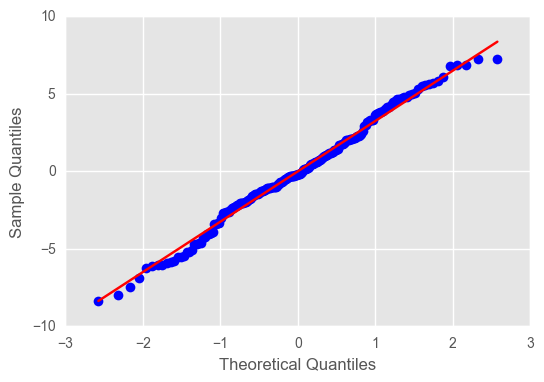

In [21]:
sm.qqplot(model_tv.resid, line = 's')

pass

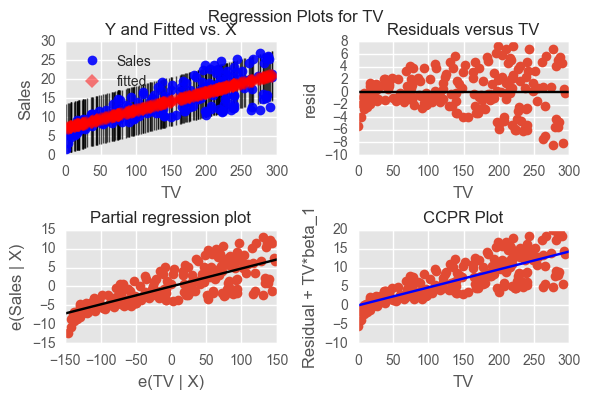

In [22]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

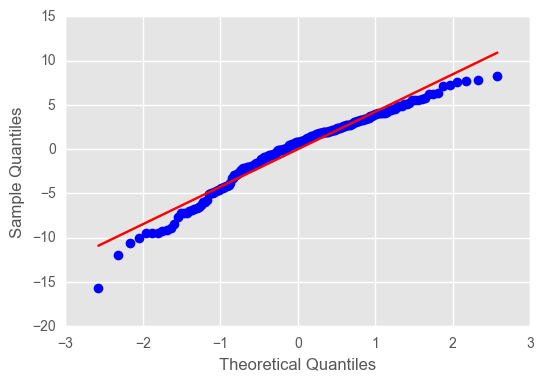

In [24]:
sm.qqplot(model_radio.resid, line = 's')

pass

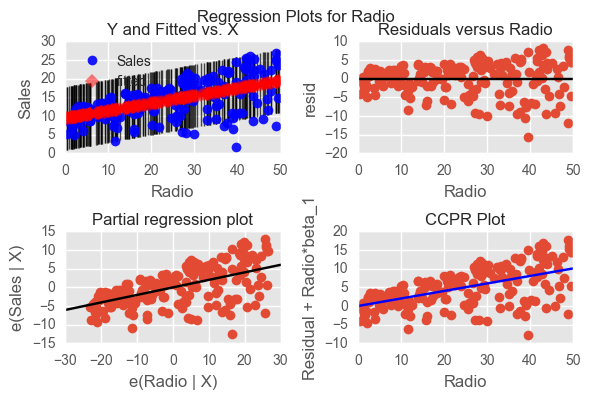

In [25]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

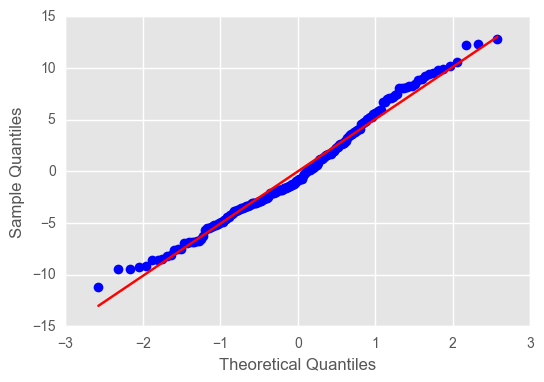

In [26]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

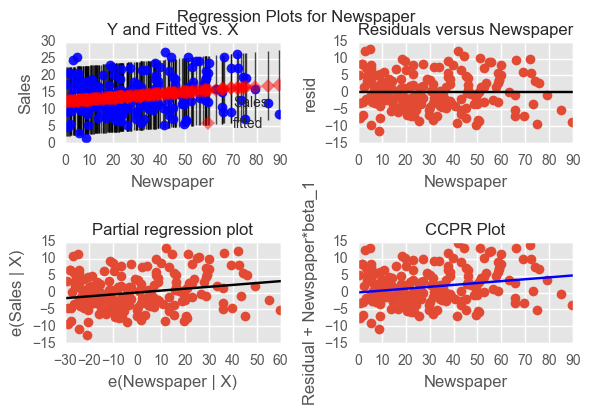

In [27]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [29]:
# TODO

model.summary()

NameError: name 'model' is not defined

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D - Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [ ]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass